In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing my Spotify listening activity between 04.03.2021 00:00 and 04.03.2022 22:20

In [2]:
data = pd.read_json("2022-03-04-spotify.json")

In [3]:
data["endTime"] = pd.to_datetime(data["endTime"], format='%Y-%m-%d %H:%M')
data["month"] = data["endTime"].dt.to_period("M")
data["week"] = data["endTime"].dt.to_period("W")

In [4]:
data.head()

,endTime,artistName,trackName,msPlayed,month,week
0,2021-03-04 00:02:00,Architects,Dying Is Absolutely Safe,299013,2021-03,2021-03-01/2021-03-07
1,2021-03-04 00:05:00,Architects,Death Is Not Defeat,225040,2021-03,2021-03-01/2021-03-07
2,2021-03-04 00:10:00,Architects,Hereafter,255586,2021-03,2021-03-01/2021-03-07
3,2021-03-04 00:13:00,Architects,Mortal After All,219773,2021-03,2021-03-01/2021-03-07
4,2021-03-04 00:18:00,Architects,Holy Hell,253973,2021-03,2021-03-01/2021-03-07


In [5]:
artist_month = data.pivot_table(values="msPlayed", columns="month", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_month = artist_month.sort_values(by='All', ascending=False)
artist_month = artist_month[artist_month["All"] != 0]
artist_month = artist_month.drop(index=['All'])
del(artist_month['All'])

In [6]:
artist_month[:10]

month,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
artistName,,,,,,,,,,,,,
Tristam,38561092,103819909,67421186,45759039,8384051,21082347,25976707,16338292,16198019,42075194,20017786,16814081,3441726
ILLENIUM,6563265,1867282,6162735,4864156,19632684,13338372,13629200,12611913,65877389,37353173,39978928,17769305,1935307
Architects,51294221,26077763,36132546,24996171,38028417,24550736,13163429,3228658,3010222,4752912,4229447,1721787,0
Dabin,1865661,515000,4400302,5059057,1467570,843122,2335484,1217884,9005389,22682359,72184596,34794316,24209121
Seven Lions,9991748,6453686,3532502,5490138,12008038,9797441,16467303,21611748,12679889,14283673,27380691,14138287,4375420
Sullivan King,5055743,1398048,1497427,29623495,27936175,7336617,8046804,19154626,16893357,13239254,18143590,6117522,0
Au5,20146382,6606471,7562658,15261850,12903331,7057593,7005163,16422870,8544474,10268843,15124287,8685516,1555863
Ran-D,5964951,802228,0,11482143,3221830,8057539,37073727,5117337,7111819,8872001,18177318,6850730,0
Trivecta,12008094,1924202,8095245,7466412,4807980,6681158,3919072,8289925,1436565,9309883,19711508,14818081,2022080


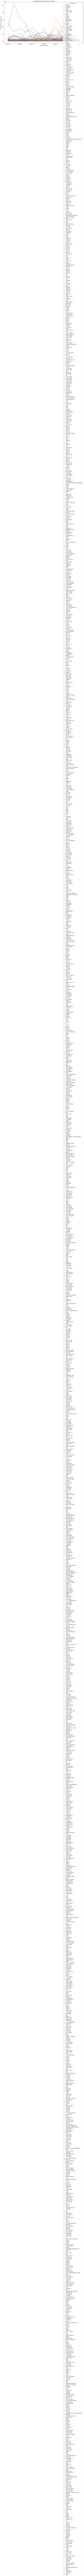

In [7]:
ax = artist_month.T.plot(title = "time listened to my artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

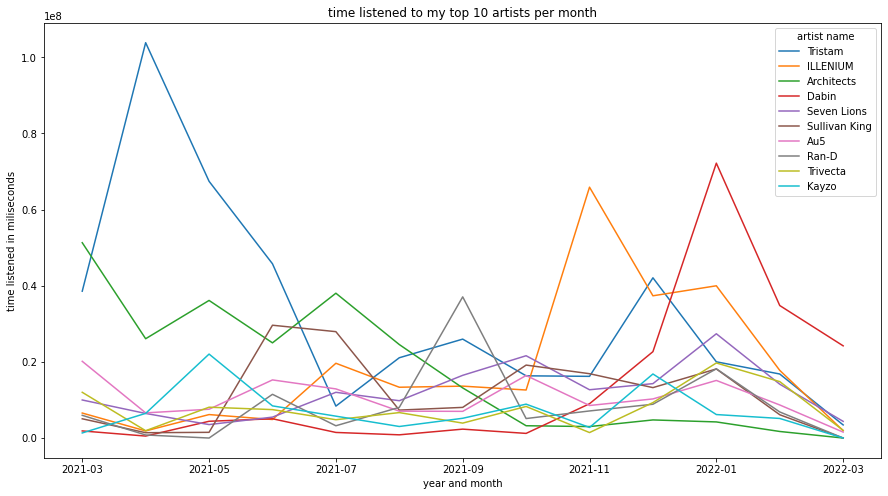

In [8]:
ax = artist_month[:10].T.plot(title = "time listened to my top 10 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

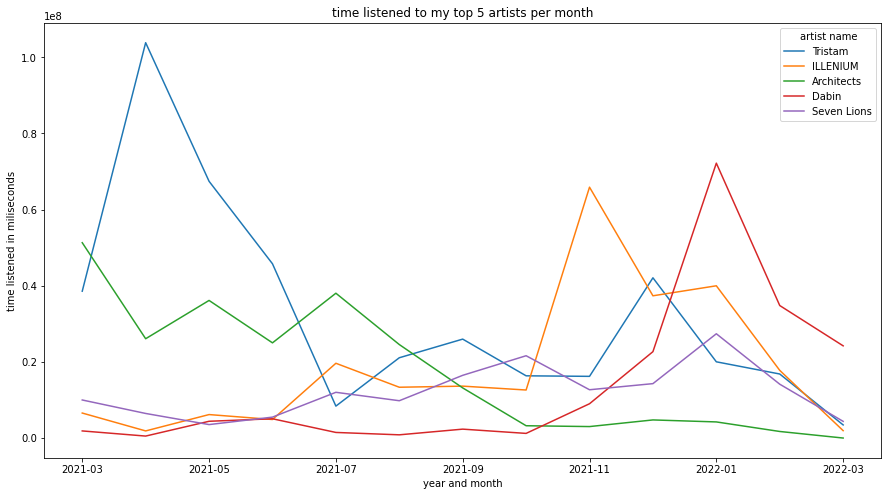

In [9]:
ax = artist_month[:5].T.plot(title = "time listened to my top 5 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

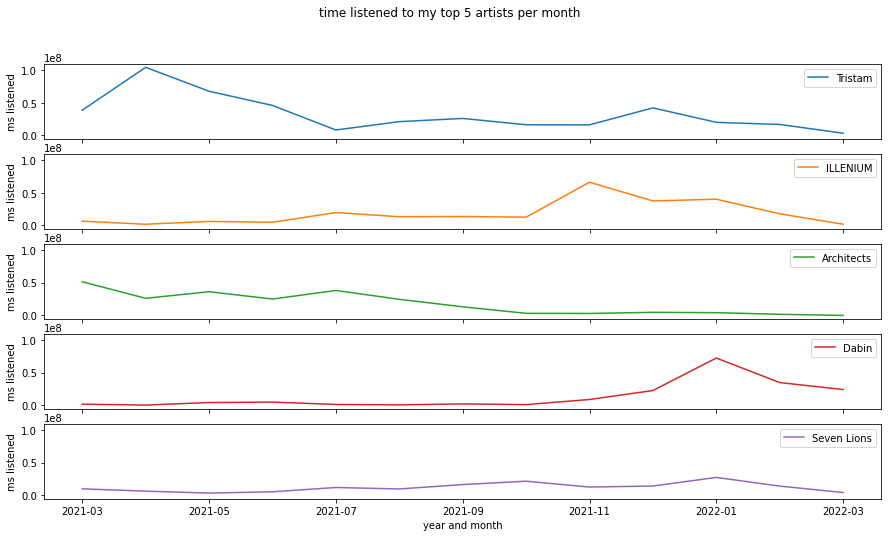

In [10]:
ax = artist_month[:5].T.plot(title = "time listened to my top 5 artists per month",
                         xlabel = "year and month", 
                         ylabel = "ms listened", 
                         figsize = (15,8), 
                         kind = "line",
                         subplots = True,
                         sharey = True)

In [11]:
artist_week = data.pivot_table(values="msPlayed", columns="week", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_week = artist_week.sort_values(by='All', ascending=False)
artist_week = artist_week[artist_week["All"] != 0]
artist_week = artist_week.drop(index=['All'])
del(artist_week['All'])

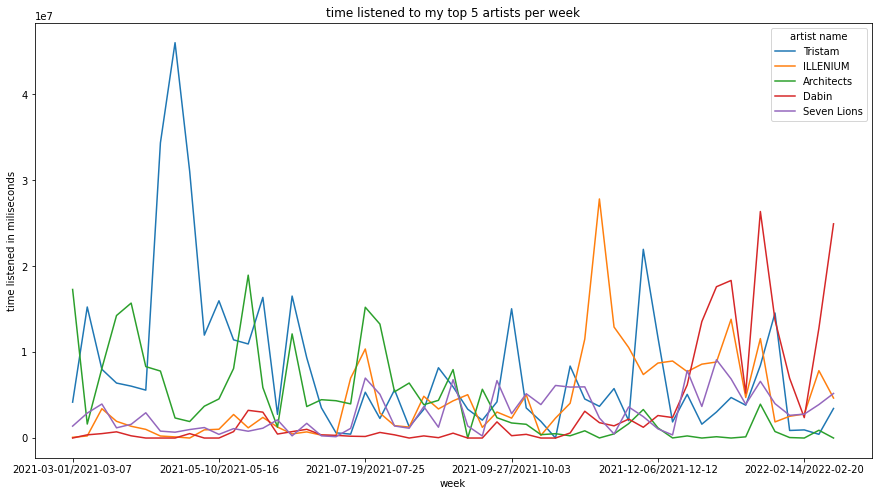

In [12]:
ax = artist_week[:5].T.plot(title = "time listened to my top 5 artists per week",
                         xlabel = "week", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

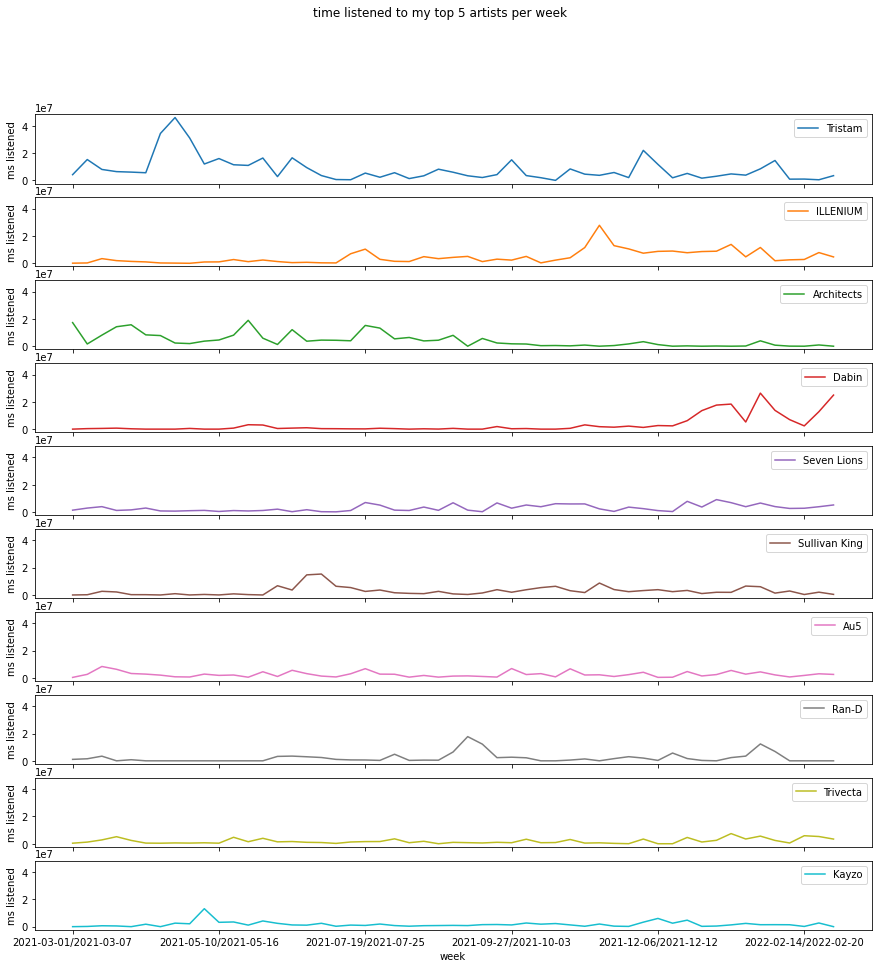

In [13]:
ax = artist_week[:10].T.plot(title = "time listened to my top 5 artists per week",
                         xlabel = "week", 
                         ylabel = "ms listened", 
                         figsize = (15,15), 
                         kind = "line",
                         subplots = True,
                         sharey = True)